# Loading


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


ROOT_PATH = "data/gitlab/with_energy/"

In [2]:
prometheus_mem_data = pd.read_csv(ROOT_PATH + "prometheus_mem_used.csv")
# Convert memory
for label in prometheus_mem_data.loc[:, prometheus_mem_data.columns != "timestamp"]:
    prometheus_mem_data[label] = [d / 1e9 for d in prometheus_mem_data[label]]


prometheus_mem_data["timestamp"] = pd.to_datetime(
    prometheus_mem_data["timestamp"], unit="s", utc=True
)
prometheus_mem_data["Total"] = prometheus_mem_data.drop("timestamp", axis=1).sum(axis=1)

prometheus_cpu_data = pd.read_csv(ROOT_PATH + "prometheus_cpu_used.csv")
prometheus_cpu_data["timestamp"] = pd.to_datetime(
    prometheus_cpu_data["timestamp"], unit="s", utc=True
)
prometheus_cpu_data["Total"] = prometheus_cpu_data.drop("timestamp", axis=1).sum(axis=1)

prometheus_receive_data = pd.read_csv(ROOT_PATH + "prometheus_receive.csv")
prometheus_receive_data["timestamp"] = pd.to_datetime(
    prometheus_receive_data["timestamp"], unit="s", utc=True
)
prometheus_receive_data["Total"] = prometheus_receive_data.drop(
    "timestamp", axis=1
).sum(axis=1)

prometheus_transmit_data = pd.read_csv(ROOT_PATH + "prometheus_transmit.csv")
prometheus_transmit_data["timestamp"] = pd.to_datetime(
    prometheus_transmit_data["timestamp"], unit="s", utc=True
)
prometheus_transmit_data["Total"] = prometheus_transmit_data.drop(
    "timestamp", axis=1
).sum(axis=1)

prometheus_cpu_data.drop("timestamp", axis=1)

,dependencies,gitaly,gitlab-exporter,gitlab-shell,gitlab-workhorse,kas,metrics,minio,postgresql,prometheus-server,prometheus-server-configmap-reload,redis,registry,sidekiq,toolbox,webservice,Total
0,NaN,0.018048,0.004580,0.029649,0.004092,0.007601,0.000742,0.000253,0.010473,0.069784,0.000076,0.021734,0.001101,0.101046,0.0,0.051513,0.320693
1,NaN,0.017433,0.004478,0.031903,0.004117,0.007651,0.000589,0.000285,0.015281,0.191742,0.000087,0.025202,0.001096,0.182019,0.0,0.046628,0.528509
2,NaN,0.011144,0.004417,0.028762,0.003573,0.007519,0.000844,0.000259,0.036070,0.725173,0.000083,0.023113,0.000694,0.376495,0.0,0.050531,1.268676
3,NaN,0.016506,0.004818,0.031244,0.003697,0.007835,0.000474,0.000056,0.054914,0.919312,0.000055,0.019784,0.000647,0.608742,0.0,0.051896,1.719981
4,NaN,0.017208,0.004833,0.031646,0.003586,0.006813,0.000674,0.000066,0.054208,0.939668,0.000028,0.022549,0.001051,0.601396,0.0,0.041737,1.725464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,NaN,0.019081,0.004875,0.028842,0.004228,0.006970,0.000846,0.000184,0.007870,0.009636,0.000103,0.021554,0.000856,0.094509,0.0,0.051807,0.251361
1677,NaN,0.015119,0.004913,0.029375,0.003865,0.008382,0.000776,0.000184,0.010699,0.047508,0.000098,0.023565,0.001267,0.136903,0.0,0.053002,0.335655
1678,NaN,0.017498,0.004828,0.031975,0.003847,0.007747,0.001070,0.000216,0.007693,0.041350,0.000024,0.019735,0.001127,0.117154,0.0,0.048572,0.302836
1679,NaN,0.017070,0.005230,0.026793,0.003704,0.008099,0.000652,0.000081,0.010425,0.043449,0.000023,0.023564,0.000837,0.135781,0.0,0.049508,0.325217


In [3]:
services = [
    "compose-post-service",
    "home-timeline-redis",
    "home-timeline-service",
    "jaeger",
    "media-frontend",
    "media-memcached",
    "media-mongodb",
    "media-service",
    "nginx-thrift",
    "post-storage-memcached",
    "post-storage-mongodb",
    "post-storage-service",
    "social-graph-mongodb",
    "social-graph-redis",
    "social-graph-service",
    "text-service",
    "unique-id-service",
    "url-shorten-memcached",
    "url-shorten-mongodb",
    "url-shorten-service",
    "user-memcached",
    "user-mention-service",
    "user-mongodb",
    "user-service",
    "user-timeline-mongodb",
    "user-timeline-redis",
    "user-timeline-service",
]

service = "Total"

/var/folders/5_/wks2d2t50qb8f1pxwz7dctb80000gn/T/ipykernel_17191/2849444965.py:2: DtypeWarning: Columns (9,12,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  influx_data = pd.read_csv(ROOT_PATH + "influx.csv")


,timestamp,Total
0,2024-10-01 11:00:00+00:00,0.320693
1,2024-10-01 11:00:30+00:00,0.528509
2,2024-10-01 11:01:00+00:00,1.268676
3,2024-10-01 11:01:30+00:00,1.719981
4,2024-10-01 11:02:00+00:00,1.725464
...,...,...
1676,2024-10-02 00:58:00+00:00,0.251361
1677,2024-10-02 00:58:30+00:00,0.335655
1678,2024-10-02 00:59:00+00:00,0.302836
1679,2024-10-02 00:59:30+00:00,0.325217


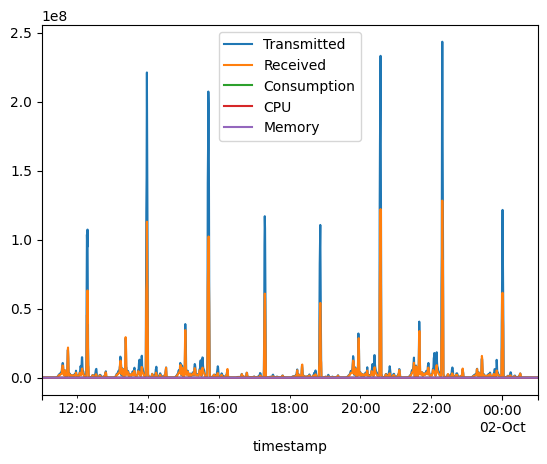

In [4]:
# Inner join: only include timestamps that are present in both DataFrames
influx_data = pd.read_csv(ROOT_PATH + "influx.csv")
# Convert _time to datetime
influx_data["_time"] = pd.to_datetime(influx_data["_time"])

# Add total

totals = influx_data.groupby("_time")["_value"].sum().reset_index()
# Ajouter une nouvelle colonne 'target' avec la valeur 'total'
totals["target"] = "Total"
# Fusionner les résultats avec le DataFrame d'origine
influx_data = pd.concat([influx_data, totals], ignore_index=True, sort=False)


consumption = influx_data[influx_data["target"] == service][["_time", "_value"]].rename(
    columns={"_time": "timestamp", "_value": "Consumption"}
)

cpu = prometheus_cpu_data[["timestamp", service]].rename(columns={service: "CPU"})
memory = prometheus_mem_data[["timestamp", service]].rename(columns={service: "Memory"})

received = prometheus_receive_data[
    [
        col
        for col in prometheus_receive_data.columns
        if service in col or col == "timestamp"
    ]
]
received = received.rename(
    columns={col: "Received" if service in col else col for col in received.columns}
)

transmitted = prometheus_transmit_data[
    [
        col
        for col in prometheus_transmit_data.columns
        if service in col or col == "timestamp"
    ]
]
transmitted = transmitted.rename(
    columns={
        col: "Transmitted" if service in col else col for col in transmitted.columns
    }
)

merged_inner = pd.merge(cpu, memory, on="timestamp", how="inner")
merged_inner = pd.merge(consumption, merged_inner, on="timestamp", how="inner")
merged_inner = pd.merge(received, merged_inner, on="timestamp", how="inner")
merged_inner = pd.merge(transmitted, merged_inner, on="timestamp", how="inner")

merged_inner = merged_inner.set_index("timestamp")
merged_inner.plot()

prometheus_cpu_data[["timestamp", service]]

<Axes: xlabel='timestamp'>

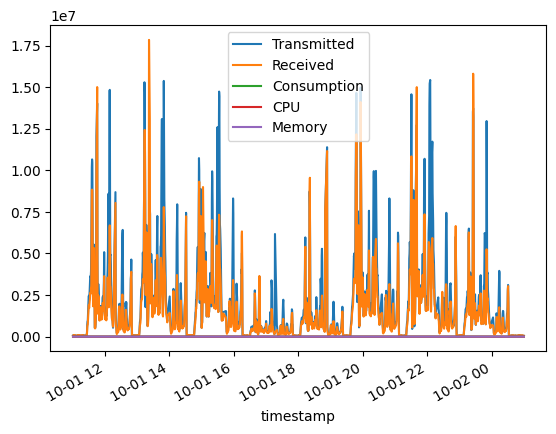

In [5]:
merged_inner = merged_inner.drop(merged_inner["Transmitted"].nlargest(75).index)
merged_inner.plot()

<Axes: xlabel='timestamp'>

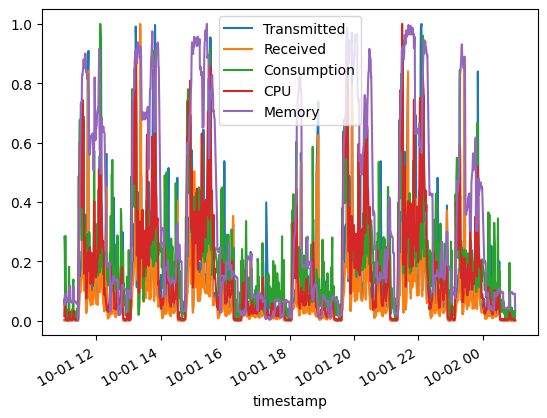

In [6]:
test = (merged_inner - merged_inner.min()) / (merged_inner.max() - merged_inner.min())
test.plot()

# Carbon


In [7]:
f_cpu_die_gwp = 1.97
f_cpu_die_adp = 5.87e-07
f_cpu_die_pe = 2.65e01

i_cpu_base_gwp = 9.14
i_cpu_base_adp = 2.04e-02
i_cpu_base_pe = 156.43

f_flash_die_gwp = 2.20
f_flash_die_adp = 6.30e-05
f_flash_die_pe = 2.73e01

i_ram_base_gwp = 5.22
i_ram_base_adp = 1.69e-03
i_ram_base_pe = 74.00

i_ssd_base_gwp = 6.34
i_ssd_base_adp = 5.63e-04
i_ssd_base_pe = 73.98

i_hdd_gwp = 3.11e01
i_hdd_adp = 2.50e-04
i_hdd_pe = 2.76e02

f_psu_e_gwp = 2.43e01
f_psu_e_adp = 8.30e-03
f_psu_e_pe = 3.52e02

i_motherboard_gwp = 6.61e01
i_motherboard_adp = 3.69e-03
i_motherboard_pe = 8.36e02

i_assembly_gwp = 6.68
i_assembly_adp = 1.41e-06
i_assembly_pe = 6.86e01

i_rack_gwp = 1.50e02
i_rack_adp = 2.02e-02
i_rack_pe = 2.20e03

## Env


In [8]:
PUE = 1.5
EMB_DC = 2.61e-02 / 1000

## R740


## Embodied


In [9]:
life_expectency = 5 * 365 * 24

r740_vcpus = 44
r740_ram = 12 * 32
r740_storage = 400 + 8 * 3840

cpu_e_gwp = 45.6236  # See hotcarbon
ram_e_gwp = 534.5953072625698  # See hotcarbon
ssd_e_gwp = 3660.4284210526316  # See hotcarbon
others_gwp = 295.4856  # See hotcarbon

instance_vcpu = 4
instance_vram = 8
instance_vssd = 80


def vres_e(emb_impact: float, quantity: int, total_instance: int):
    return (emb_impact / life_expectency) * (quantity / total_instance)


ci_cpu_e = vres_e(cpu_e_gwp, instance_vcpu, r740_vcpus)
ci_ram_e = vres_e(ram_e_gwp, instance_vram, r740_ram)
ci_storage_e = vres_e(ssd_e_gwp, instance_vssd, r740_storage)


print(ci_cpu_e)
print(ci_ram_e)
print(ci_storage_e)

9.469406392694064e-05
0.000254278589831892
0.0002148365684786322


## Cloud instance


## Embodied


In [10]:
life_expectency = 5 * 365 * 24

r740_vcpus = 44
r740_ram = 12 * 32
r740_storage = 400 + 8 * 3840

instance_vcpu = 4
instance_vram = 8
instance_vssd = 80


def vres_e(emb_impact: float, quantity: int, total_instance: int):
    return (emb_impact / life_expectency) * (quantity / total_instance)


ci_cpu_e = vres_e(cpu_e_gwp, instance_vcpu, r740_vcpus)
ci_ram_e = vres_e(ram_e_gwp, instance_vram, r740_ram)
ci_storage_e = vres_e(ssd_e_gwp, instance_vssd, r740_storage)


print(ci_cpu_e)
print(ci_ram_e)
print(ci_storage_e)

9.469406392694064e-05
0.000254278589831892
0.0002148365684786322


## Usage


In [11]:
power_cpu = 104.75
power_ram = 0.54 * r740_ram
power_ssd = 5.7 * 9  # https://www.techpowerup.com/ssd-specs/samsung-950-pro-512-gb.d74

others_power = 0.2 * (power_cpu + power_ram + power_ssd)
total_power = power_cpu + power_ram + power_ssd + others_power

elec_mix = 0.098 / 1000


def vres_u(usage_impact: float, quantity: int, total_instance: int):
    # return usage_impact * (quantity / total_instance)
    return (usage_impact * quantity) / total_instance


ci_cpu_u = vres_u((power_cpu * elec_mix), instance_vcpu, r740_vcpus)
ci_ram_u = vres_u((power_ram * elec_mix), instance_vram, r740_ram)
ci_storage_u = vres_u((power_ssd * elec_mix), instance_vssd, r740_storage)

print(ci_cpu_u)
print(ci_ram_u)
print(ci_storage_u)

0.0009332272727272727
0.00042336000000000007
1.2923907455012858e-05


In [12]:
# On ne compte pas les disques, que cpu ram others environment
#


def get_instance_gwp_u(
    cpu_consumption: float, instance_memory: float, duration_seconds: float
) -> float:

    # cpu = vres_u((power_cpu * elec_mix), instance_cpu, r740_vcpus)
    cpu = cpu_consumption * elec_mix
    ram = vres_u((power_ram * elec_mix), instance_memory, r740_ram)
    others = vres_u((others_power * elec_mix), instance_vcpu, r740_vcpus)

    # Assess total instance cons for env
    # cpu_cons = power_cpu * (instance_cpu / r740_vcpus)
    ram_cons = power_ram * (instance_memory / r740_ram)
    # i_ssd_cons = power_ssd * (instance_vssd / r740_storage)
    others_cons = others_power * cpu_consumption
    power = cpu_consumption + ram_cons + others_cons
    environment = (power) * (PUE - 1) * elec_mix

    return (cpu + ram + others + environment) * (duration_seconds / 3600)


def get_instance_gwp_e(
    instance_cpu: float, instance_memory: float, duration_seconds: float
) -> float:
    cpu = vres_e(cpu_e_gwp, instance_cpu, r740_vcpus)
    ram = vres_e(ram_e_gwp, instance_memory, r740_ram)
    others = vres_e(others_gwp, instance_vcpu, r740_vcpus)

    # Assess total instance cons for env
    cpu_cons = power_cpu * (instance_cpu / r740_vcpus)
    ram_cons = power_ram * (instance_memory / r740_ram)
    # i_ssd_cons = power_ssd * (instance_vssd / r740_storage)
    others_cons = others_power * (instance_cpu / r740_vcpus)
    power = cpu_cons + ram_cons + others_cons
    environment = power * EMB_DC

    return (cpu + ram + others + environment) * (duration_seconds / 3600)


def get_instance_gwp(
    instance_cpu: float,
    instance_memory: float,
    duration_seconds: float,
    cpu_consumption: float,
) -> float:
    usage = get_instance_gwp_u(
        cpu_consumption=cpu_consumption,
        instance_memory=instance_memory,
        duration_seconds=duration_seconds,
    )
    embodied = get_instance_gwp_e(
        instance_cpu=instance_cpu,
        instance_memory=instance_memory,
        duration_seconds=duration_seconds,
    )

    return usage + embodied

## Computation


In [13]:
considered_workkload = "Transmitted"  # "Received"

updated_df = merged_inner.copy().drop("Received", axis=1)
updated_df.rename(columns={considered_workkload: "Workload"})
updated_df

,Transmitted,Consumption,CPU,Memory
timestamp,,,,
2024-10-01 11:00:30+00:00,63307.734412,3269.186980,0.528509,11.476861
2024-10-01 11:01:00+00:00,69559.464568,3231.486740,1.268676,11.047948
2024-10-01 11:01:30+00:00,94997.801776,2991.814556,1.719981,11.944931
2024-10-01 11:02:00+00:00,65973.663652,2255.819409,1.725464,11.917246
2024-10-01 11:02:30+00:00,70385.067979,3290.850264,1.178333,11.985621
...,...,...,...,...
2024-10-02 00:58:00+00:00,52857.608799,2022.289644,0.251361,12.006212
2024-10-02 00:58:30+00:00,52360.792430,1997.109257,0.335655,12.025881
2024-10-02 00:59:00+00:00,50418.501151,1945.449502,0.302836,11.980251


# Ideal


$$ideal(w) = a \times w^b + c$$

Ou:

- $a$ est le minimum par unité de workload
- $b$ est le coût marginal moyen
- $c$ est l'idle, i.e. le min observé sur toute la période


Normal CPU: A=0.0000, B=1.0691, C=0.2793
Scikit CPU: A=0.0015, B=0.5421, C=0.0000

Normal Memory: A=0.0000, B=1.0075, C=9.8886
Scikit Memory: A=0.2058, B=0.2969, C=5.4338

Normal Consumption: A=0.0004, B=0.9808, C=1973.4452
Scikit Consumption: A=294.4386, B=0.1460, C=651.7176



/var/folders/5_/wks2d2t50qb8f1pxwz7dctb80000gn/T/ipykernel_17191/1626848975.py:207: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


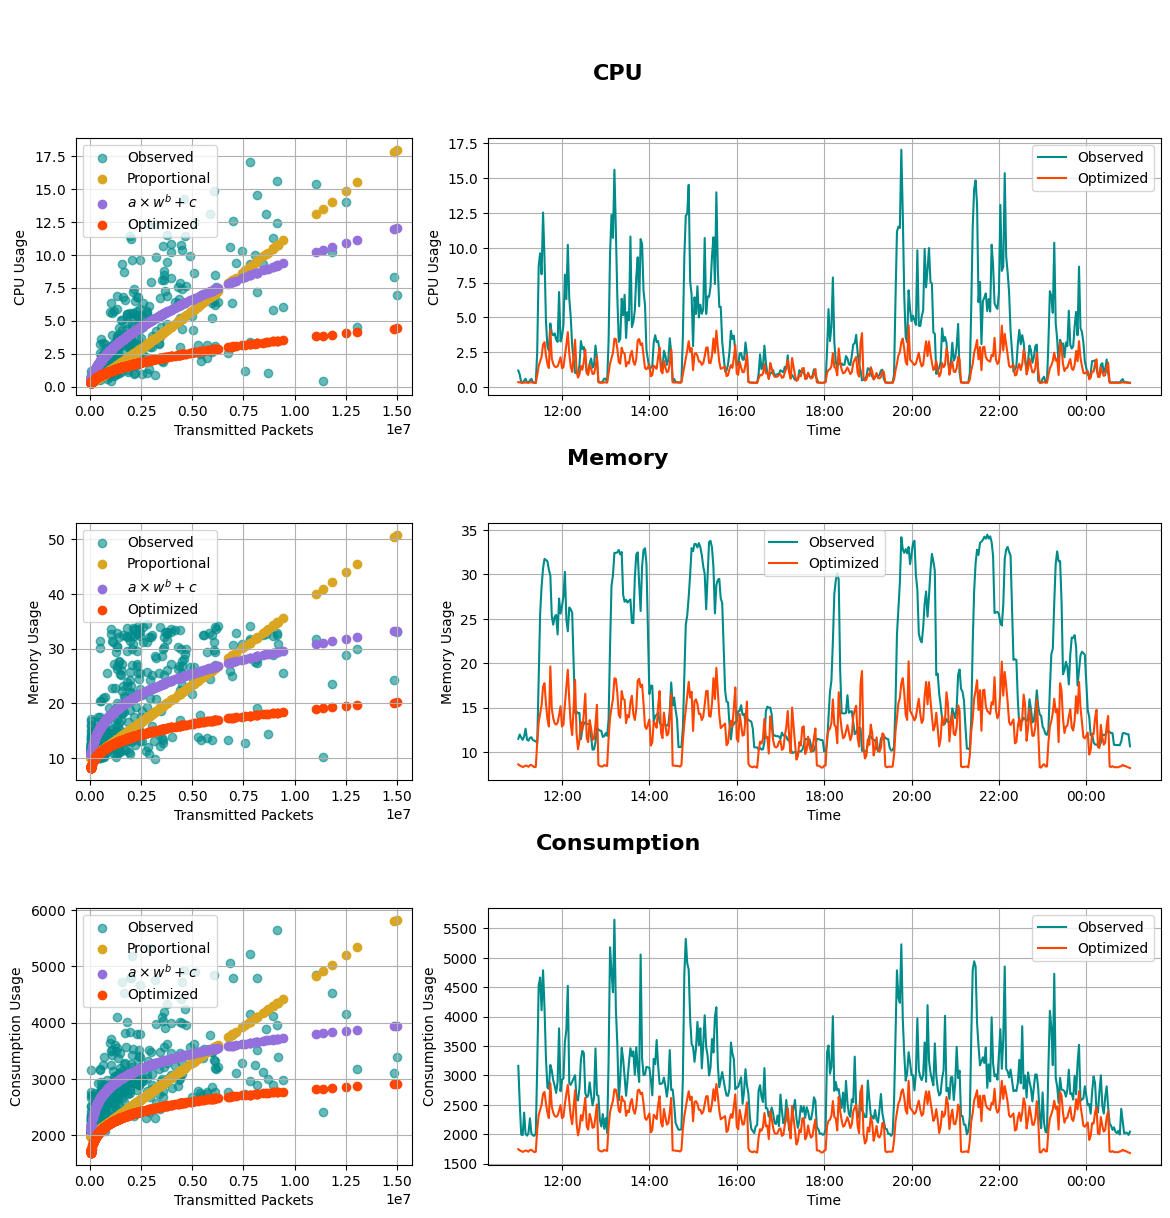

In [14]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# Assume updated_df is already defined
# For demonstration, here's a mock updated_df
# Uncomment the following lines if you need to create a sample DataFrame
# np.random.seed(0)
# dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
# updated_df = pd.DataFrame({
#     'Transmitted': np.random.uniform(100, 1000, size=100),
#     'CPU': np.random.uniform(10, 100, size=100),
#     'Memory': np.random.uniform(200, 800, size=100),
#     'Consumption': np.random.uniform(50, 500, size=100)
# }, index=dates)

# Configuration
considered_workload = "Transmitted"  # "Received"
considered_dataframe = (
    updated_df.copy().dropna().resample("2min").mean().dropna()
)  # Clean the data
delta_timestamps_seconds = 60 * 2

resources = ["CPU", "Memory", "Consumption"]
num_resources = len(resources)

# Create a single figure
fig = plt.figure(figsize=(14, 5 * num_resources))
# Define GridSpec: For each resource, allocate 2 rows (title + plots) and 2 columns (left and right plots)
gs = GridSpec(
    nrows=num_resources * 2,
    ncols=2,
    figure=fig,
    width_ratios=[1, 2],
    height_ratios=[1, 2] * num_resources,
    hspace=0,
    wspace=0.15,
)  # Reduced wspace

# Colors for each label
colors = {
    "Observed": "darkcyan",
    "Proportional": "goldenrod",
    r"$a \times w^b +c$": "mediumpurple",
    "Ideal": "orangered",
}

global_ideal_df = pd.DataFrame(index=considered_dataframe.index)

for idx, resource in enumerate(resources):
    # Calculate row positions
    title_row = idx * 2
    plot_row = idx * 2 + 1

    ######################################
    # a est le min par unité de workload #
    ######################################
    marginals = (
        considered_dataframe[resource] / considered_dataframe[considered_workload]
    )
    quantile_5_percent = marginals.quantile(0.05)
    smallest_5_percent = marginals[marginals <= quantile_5_percent]
    a = smallest_5_percent.mean()

    ##############################################################
    # c est est l'idle, i.e. le min observé sur toute la période #
    ##############################################################
    c = considered_dataframe[resource].min()

    ################################
    # b est le coût marginal moyen #
    ################################
    def b_model(w, b):
        return a * w**b + c

    popt_b, _ = curve_fit(
        b_model,
        considered_dataframe[considered_workload],
        considered_dataframe[resource],
    )

    # Extract the estimated b
    b = popt_b[0]

    ##################################################
    # Fonction ideal qui suit la formule  a* w^b + c #
    ##################################################
    def ideal(workload):
        return a * np.power(workload, b) + c

    #################################
    # Curve fitting with scikit-learn
    #################################
    def model_corrected_simplified(ww, aa, bb, cc):
        return aa * ww**bb + cc

    # Perform curve fitting to estimate a, b, and c
    popt_corrected, _ = curve_fit(
        model_corrected_simplified,
        considered_dataframe[considered_workload],
        considered_dataframe[resource],
        bounds=([a, 0, 0], [np.inf, np.inf, np.inf]),
    )
    scikit_a, scikit_b, scikit_c = popt_corrected

    # Add fitted curve from scikit to the scatter plot
    scikit_ideal = (
        scikit_a * np.power(considered_dataframe[considered_workload], scikit_b)
        + scikit_c
    )

    # Add updated scikit model with reduction factor
    reduction_factor = 0.90
    scikit_updated = (scikit_a * reduction_factor) * np.power(
        considered_dataframe[considered_workload], scikit_b * reduction_factor
    ) + (scikit_c * reduction_factor)

    ########
    # Plot #
    ########

    # Add title subplot (spanning both columns)
    ax_title = fig.add_subplot(gs[title_row, :])
    ax_title.axis("off")  # Hide the axes
    ax_title.text(
        0.5, 0.5, resource, fontsize=16, ha="center", va="center", fontweight="bold"
    )

    # Left subplot: Scatter plot
    ax1 = fig.add_subplot(gs[plot_row, 0])

    ax1.scatter(
        considered_dataframe[considered_workload],
        considered_dataframe[resource],
        color=colors["Observed"],
        label="Observed",
        alpha=0.6,
    )
    ax1.scatter(
        considered_dataframe[considered_workload],
        considered_dataframe[considered_workload].apply(ideal),
        color=colors["Proportional"],
        label="Proportional",
    )
    ax1.scatter(
        considered_dataframe[considered_workload],
        scikit_ideal,
        color=colors[r"$a \times w^b +c$"],
        label=r"$a \times w^b +c$",
    )
    ax1.scatter(
        considered_dataframe[considered_workload],
        scikit_updated,
        color=colors["Ideal"],
        label="Optimized",
    )
    ax1.set_xlabel("Transmitted Packets")
    ax1.set_ylabel(f"{resource} Usage")

    # Set y-axis to scientific notation
    ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    ax1.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))

    ax1.grid(True)
    ax1.legend(loc="best")

    ####################
    # Time Series Plot #
    ####################
    ax2 = fig.add_subplot(gs[plot_row, 1])

    ideal_df = pd.DataFrame()
    ideal_df[resource] = considered_dataframe[resource]
    ideal_df["Sci updated"] = scikit_updated

    # Plot time series on the right subplot
    ax2.plot(
        considered_dataframe.index,
        ideal_df[resource],
        label="Observed",
        color=colors["Observed"],
    )
    ax2.plot(
        considered_dataframe.index,
        ideal_df["Sci updated"],
        label="Optimized",
        color=colors["Ideal"],
    )
    ax2.set_xlabel("Time")
    ax2.set_ylabel(f"{resource} Usage")
    # Set x-axis major formatter to display hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    ax2.grid(True)
    ax2.legend()

    # Print the estimated parameters
    print(f"Normal {resource}: A={a:.4f}, B={b:.4f}, C={c:.4f}")
    print(f"Scikit {resource}: A={scikit_a:.4f}, B={scikit_b:.4f}, C={scikit_c:.4f}\n")

    global_ideal_df["Ideal " + resource] = ideal_df["Sci updated"]
    global_ideal_df[resource] = ideal_df[resource]

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.gcf().savefig(
    "figures/proportionality/prop.pdf",
    bbox_inches="tight",
)

In [15]:
global_ideal_df

,Ideal CPU,CPU,Ideal Memory,Memory,Ideal Consumption,Consumption
timestamp,,,,,,
2024-10-01 11:00:00+00:00,0.334923,1.172389,8.620453,11.489914,1747.221594,3164.162759
2024-10-01 11:02:00+00:00,0.313356,0.881042,8.486942,11.978790,1726.596021,2522.887912
2024-10-01 11:04:00+00:00,0.299430,0.315675,8.398514,11.641642,1712.720339,1995.607303
2024-10-01 11:06:00+00:00,0.287801,0.302499,8.323238,11.374794,1700.767637,1985.070770
2024-10-01 11:08:00+00:00,0.297143,0.442218,8.383816,11.757705,1710.396765,2369.054486
...,...,...,...,...,...,...
2024-10-02 00:52:00+00:00,0.306630,0.332990,8.444465,12.145270,1719.952641,2016.847815
2024-10-02 00:54:00+00:00,0.303180,0.338284,8.422512,12.075258,1716.503250,2028.470200
2024-10-02 00:56:00+00:00,0.289342,0.323840,8.333292,12.003453,1702.371709,2023.887471


In [16]:
##########
# Normal #
##########


global_ideal_df["Embodied"] = global_ideal_df.apply(
    lambda row: get_instance_gwp_e(
        instance_memory=row["Memory"],
        instance_cpu=row["CPU"],
        duration_seconds=delta_timestamps_seconds,
    ),
    axis=1,
)
global_ideal_df["Usage"] = global_ideal_df.apply(
    lambda row: get_instance_gwp_u(
        instance_memory=row["Memory"],
        # instance_cpu=row["CPU"],
        duration_seconds=delta_timestamps_seconds,
        cpu_consumption=(row["Consumption"] / 1000) * (delta_timestamps_seconds / 3600),
    ),
    axis=1,
)
global_ideal_df["GWP"] = global_ideal_df["Usage"] + global_ideal_df["Embodied"]

#########
# Ideal #
#########


global_ideal_df["Ideal Embodied"] = global_ideal_df.apply(
    lambda row: get_instance_gwp_e(
        instance_memory=row["Ideal Memory"],
        instance_cpu=row["Ideal CPU"],
        duration_seconds=delta_timestamps_seconds,
    ),
    axis=1,
)
global_ideal_df["Ideal Usage"] = global_ideal_df.apply(
    lambda row: get_instance_gwp_u(
        instance_memory=row["Ideal Memory"],
        # instance_cpu=row["CPU"],
        duration_seconds=delta_timestamps_seconds,
        cpu_consumption=(row["Ideal Consumption"] / 1000)
        * (delta_timestamps_seconds / 3600),
    ),
    axis=1,
)
global_ideal_df["Ideal GWP"] = (
    global_ideal_df["Ideal Usage"] + global_ideal_df["Ideal Embodied"]
)

# Carbon diff


Reduction = 24.88874173681013


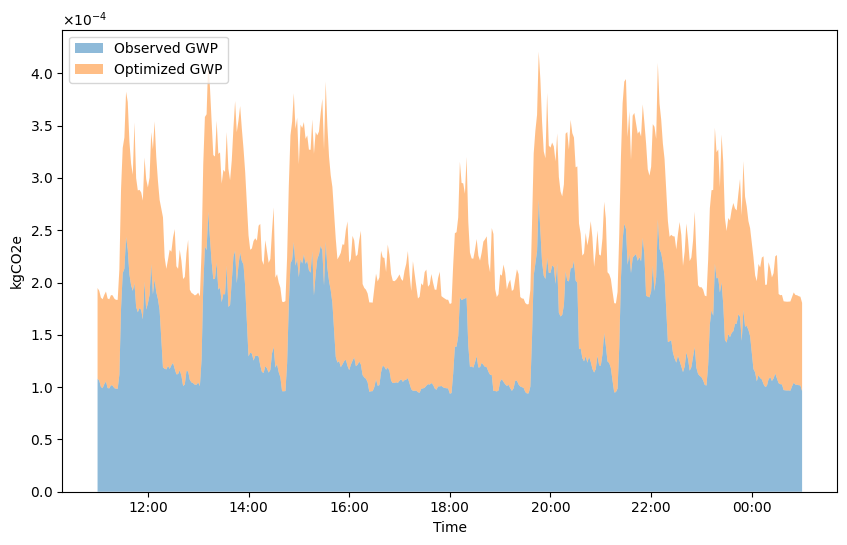

In [17]:
# Create the plot
plt.figure(figsize=(10, 6))

# Normal stackplot
plt.stackplot(
    global_ideal_df.reset_index()["timestamp"],
    global_ideal_df["GWP"],
    global_ideal_df["Ideal GWP"],
    labels=["Observed GWP", "Optimized GWP"],
    alpha=0.5,  # Add transparency
)

# Set x-axis major formatter to display hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(axis="y", style="sci", scilimits=(0, 0))


# Add labels, title, and legend
plt.xlabel("Time")
plt.ylabel("kgCO2e")
# plt.title("Comparison of Normal and Ideal Embodied and Usage Over Time")
plt.legend(loc="upper left")
plt.grid(False)

plt.gcf().savefig(
    "figures/proportionality/carbon_reduction.pdf",
    bbox_inches="tight",
)

gwp = global_ideal_df["GWP"].sum()
ideal_gwp = global_ideal_df["Ideal GWP"].sum()
print("Reduction = " + str(((gwp - ideal_gwp) / gwp) * 100))

# Ideal carbon


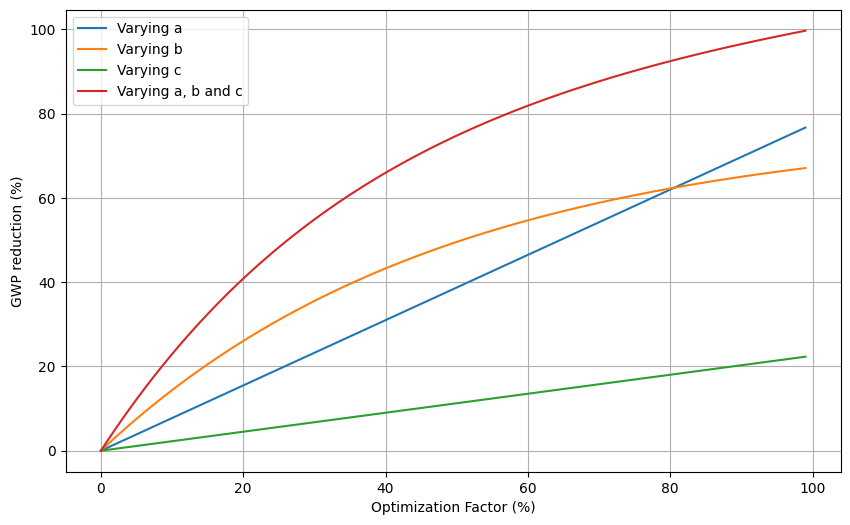

In [18]:
# List to store reduction factors and the corresponding percentage differences for a, b, and c
reduction_factors = []
percentage_differences_a = []
percentage_differences_b = []
percentage_differences_c = []
percentage_differences_abc = []

for reduction_factor in np.arange(1, 0, -0.01):
    ideal_carbon_df = pd.DataFrame(index=considered_dataframe.index)

    ideal_carbon_df["Memory"] = global_ideal_df["Memory"]
    ideal_carbon_df["CPU"] = global_ideal_df["CPU"]
    ideal_carbon_df["Consumption"] = global_ideal_df["Consumption"]

    ##########
    # Scikit #
    ##########
    def model_corrected_simplified(ww, aa, bb, cc):
        return aa * ww**bb + cc

    # Memory, CPU, and Consumption popt_corrected will remain the same as we are only adjusting them independently
    # Memory
    popt_corrected, _ = curve_fit(
        model_corrected_simplified,
        considered_dataframe[considered_workload],
        global_ideal_df["Memory"],
        bounds=([a, 0, 0], [np.inf, np.inf, np.inf]),
    )
    memory_a, memory_b, memory_c = popt_corrected

    # CPU
    popt_corrected, _ = curve_fit(
        model_corrected_simplified,
        considered_dataframe[considered_workload],
        global_ideal_df["CPU"],
        bounds=([a, 0, 0], [np.inf, np.inf, np.inf]),
    )
    cpu_a, cpu_b, cpu_c = popt_corrected

    # Consumption
    popt_corrected, _ = curve_fit(
        model_corrected_simplified,
        considered_dataframe[considered_workload],
        global_ideal_df["Consumption"],
        bounds=([a, 0, 0], [np.inf, np.inf, np.inf]),
    )
    consumption_a, consumption_b, consumption_c = popt_corrected

    ##########
    # Vary a #
    ##########
    ideal_carbon_df["Ideal Memory a"] = (memory_a * reduction_factor) * np.power(
        considered_dataframe[considered_workload], memory_b
    ) + memory_c
    ideal_carbon_df["Ideal CPU a"] = (cpu_a * reduction_factor) * np.power(
        considered_dataframe[considered_workload], cpu_b
    ) + cpu_c
    ideal_carbon_df["Ideal Consumption a"] = (
        consumption_a * reduction_factor
    ) * np.power(
        considered_dataframe[considered_workload], consumption_b
    ) + consumption_c

    ##########
    # Vary b #
    ##########
    ideal_carbon_df["Ideal Memory b"] = (
        memory_a
        * np.power(
            considered_dataframe[considered_workload], memory_b * reduction_factor
        )
        + memory_c
    )
    ideal_carbon_df["Ideal CPU b"] = (
        cpu_a
        * np.power(considered_dataframe[considered_workload], cpu_b * reduction_factor)
        + cpu_c
    )
    ideal_carbon_df["Ideal Consumption b"] = (
        consumption_a
        * np.power(
            considered_dataframe[considered_workload], consumption_b * reduction_factor
        )
        + consumption_c
    )

    ##########
    # Vary c #
    ##########
    ideal_carbon_df["Ideal Memory c"] = memory_a * np.power(
        considered_dataframe[considered_workload], memory_b
    ) + (memory_c * reduction_factor)
    ideal_carbon_df["Ideal CPU c"] = cpu_a * np.power(
        considered_dataframe[considered_workload], cpu_b
    ) + (cpu_c * reduction_factor)
    ideal_carbon_df["Ideal Consumption c"] = consumption_a * np.power(
        considered_dataframe[considered_workload], consumption_b
    ) + (consumption_c * reduction_factor)

    ##########
    # Vary abc #
    ##########
    ideal_carbon_df["Ideal Memory abc"] = (memory_a * reduction_factor) * np.power(
        considered_dataframe[considered_workload], (memory_b * reduction_factor)
    ) + (memory_c * reduction_factor)
    ideal_carbon_df["Ideal CPU abc"] = (cpu_a * reduction_factor) * np.power(
        considered_dataframe[considered_workload], (cpu_b * reduction_factor)
    ) + (cpu_c * reduction_factor)
    ideal_carbon_df["Ideal Consumption abc"] = (
        consumption_a * reduction_factor
    ) * np.power(
        considered_dataframe[considered_workload], (consumption_b * reduction_factor)
    ) + (
        consumption_c * reduction_factor
    )

    #########
    # Calculate GWP for varying a
    #########
    ideal_carbon_df["Ideal GWP a"] = ideal_carbon_df.apply(
        lambda row: get_instance_gwp(
            instance_memory=row["Ideal Memory a"],
            instance_cpu=row["Ideal CPU a"],
            duration_seconds=delta_timestamps_seconds,
            cpu_consumption=row["Ideal Consumption a"],
        ),
        axis=1,
    )
    ideal_gwp_a = ideal_carbon_df[["Ideal GWP a"]].sum().values[0]

    #########
    # Calculate GWP for varying b
    #########
    ideal_carbon_df["Ideal GWP b"] = ideal_carbon_df.apply(
        lambda row: get_instance_gwp(
            instance_memory=row["Ideal Memory b"],
            instance_cpu=row["Ideal CPU b"],
            duration_seconds=delta_timestamps_seconds,
            cpu_consumption=row["Ideal Consumption b"],
        ),
        axis=1,
    )
    ideal_gwp_b = ideal_carbon_df[["Ideal GWP b"]].sum().values[0]

    #########
    # Calculate GWP for varying c
    #########
    ideal_carbon_df["Ideal GWP c"] = ideal_carbon_df.apply(
        lambda row: get_instance_gwp(
            instance_memory=row["Ideal Memory c"],
            instance_cpu=row["Ideal CPU c"],
            duration_seconds=delta_timestamps_seconds,
            cpu_consumption=row["Ideal Consumption c"],
        ),
        axis=1,
    )
    ideal_gwp_c = ideal_carbon_df[["Ideal GWP c"]].sum().values[0]

    #########
    # Calculate GWP for varying abc
    #########
    ideal_carbon_df["Ideal GWP abc"] = ideal_carbon_df.apply(
        lambda row: get_instance_gwp(
            instance_memory=row["Ideal Memory abc"],
            instance_cpu=row["Ideal CPU abc"],
            duration_seconds=delta_timestamps_seconds,
            cpu_consumption=row["Ideal Consumption abc"],
        ),
        axis=1,
    )
    ideal_gwp_abc = ideal_carbon_df[["Ideal GWP abc"]].sum().values[0]

    #########
    # Normal GWP
    #########
    ideal_carbon_df["GWP"] = ideal_carbon_df.apply(
        lambda row: get_instance_gwp(
            instance_memory=row["Memory"],
            instance_cpu=row["CPU"],
            duration_seconds=delta_timestamps_seconds,
            cpu_consumption=row["Consumption"],
        ),
        axis=1,
    )
    gwp = ideal_carbon_df[["GWP"]].sum().values[0]

    reduction_factors.append(1 - reduction_factor)
    # Calculate percentage differences
    percentage_differences_a.append(((gwp - ideal_gwp_a) / gwp) * 100)
    percentage_differences_b.append(((gwp - ideal_gwp_b) / gwp) * 100)
    percentage_differences_c.append(((gwp - ideal_gwp_c) / gwp) * 100)
    percentage_differences_abc.append(((gwp - ideal_gwp_abc) / gwp) * 100)

# Plot the results for varying a, b, and c
plt.figure(figsize=(10, 6))
plt.plot(
    np.array(reduction_factors) * 100,
    percentage_differences_a,
    # marker="o",
    label="Varying a",
)
plt.plot(
    np.array(reduction_factors) * 100,
    percentage_differences_b,
    # marker="o",
    label="Varying b",
)
plt.plot(
    np.array(reduction_factors) * 100,
    percentage_differences_c,
    # marker="o",
    label="Varying c",
)
plt.plot(
    np.array(reduction_factors) * 100,
    percentage_differences_abc,
    # marker="^",
    label="Varying a, b and c",
)
# plt.title(
#     "Impact of Parameter Reductions on GWP Reduction for the Model "
#     + r"$a \times w^b + c$"
#     + " in GitLab"
# )

plt.xlabel("Optimization Factor (%)")
plt.ylabel("GWP reduction (%)")
plt.grid(True)
plt.legend()
plt.gcf().savefig(
    "figures/proportionality/param_reduction.pdf",
    bbox_inches="tight",
)

In [19]:
print(global_ideal_df.reset_index()["timestamp"].diff())
delta_timestamps_seconds = 60 * 2

0                 NaT
1     0 days 00:02:00
2     0 days 00:02:00
3     0 days 00:02:00
4     0 days 00:02:00
            ...      
410   0 days 00:02:00
411   0 days 00:02:00
412   0 days 00:02:00
413   0 days 00:02:00
414   0 days 00:02:00
Name: timestamp, Length: 415, dtype: timedelta64[ns]


# Tests de variation


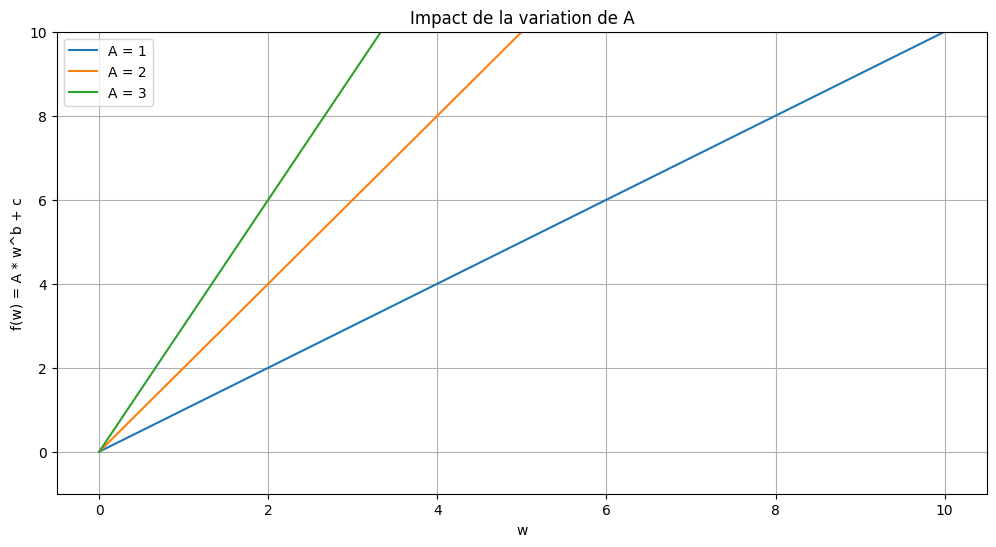

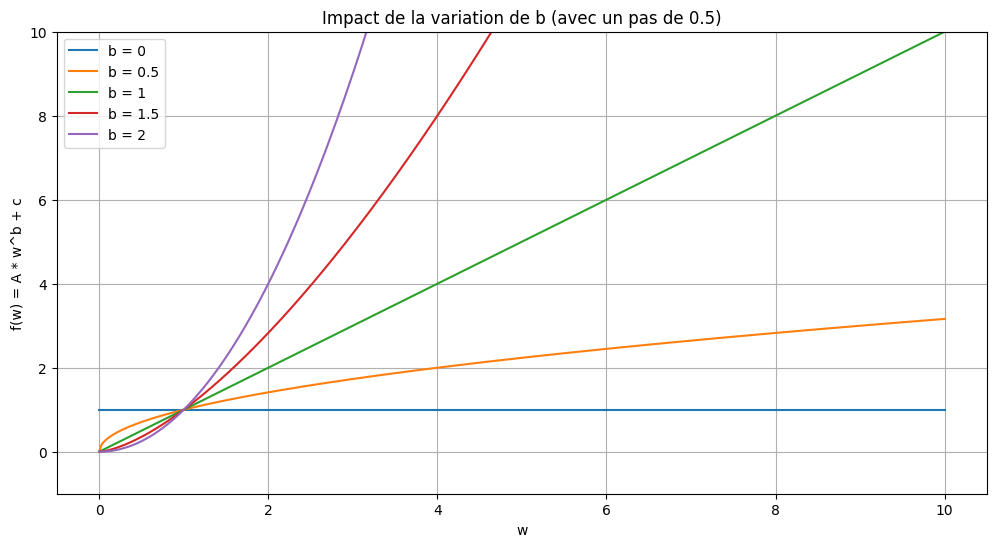

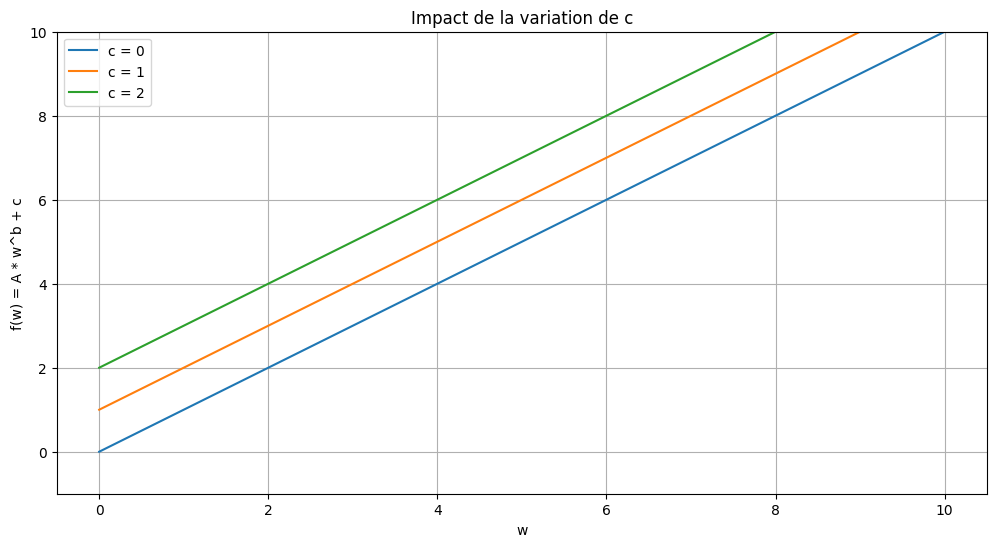

In [20]:
# Définition de la fonction
def f(w, A, b, c):
    return A * w**b + c


# Valeurs de w
w = np.linspace(0, 10, 400)

# Valeurs de A, b et c
A_values = [1, 2, 3]  # Variation de A
b_values = [0, 0.5, 1, 1.5, 2]  # Variation de b avec pas de 0.5
c_values = [0, 1, 2]  # Variation de c

# Figure 1: Variation de A
plt.figure(figsize=(12, 6))
for A in A_values:
    plt.plot(w, f(w, A, 1, 0), label=f"A = {A}")
plt.title("Impact de la variation de A")
plt.xlabel("w")
plt.ylabel("f(w) = A * w^b + c")
plt.legend()
plt.grid()
plt.ylim(-1, 10)
plt.show()

# Figure 2: Variation de b (avec pas de 0.5)
plt.figure(figsize=(12, 6))
for b in b_values:
    plt.plot(w, f(w, 1, b, 0), label=f"b = {b}")
plt.title("Impact de la variation de b (avec un pas de 0.5)")
plt.xlabel("w")
plt.ylabel("f(w) = A * w^b + c")
plt.legend()
plt.grid()
plt.ylim(-1, 10)
plt.show()

# Figure 3: Variation de c
plt.figure(figsize=(12, 6))
for c in c_values:
    plt.plot(w, f(w, 1, 1, c), label=f"c = {c}")
plt.title("Impact de la variation de c")
plt.xlabel("w")
plt.ylabel("f(w) = A * w^b + c")
plt.legend()
plt.grid()
plt.ylim(-1, 10)
plt.show()